# Two Layer - 1A

In [74]:
import numpy as np
import numpy
import matplotlib.pyplot as plt
%matplotlib inline 

In [75]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [76]:
def setParameter(X,Y,hidden_size):
    np.random.seed(3)
    input_size = X.shape[0]
    output_size = Y.shape[0]
    W1 = np.random.randn(hidden_size,input_size)*np.sqrt(2/input_size)
    b1 = np.zeros((hidden_size,1))
    W2 = np.random.randn(output_size,hidden_size)*np.sqrt(2/hidden_size)
    b2 = np.zeros((output_size,1))
    return {'W1':W1,'b1':b1,'W2':W2,'b2':b2}
    

In [77]:
def forwardprop(X,params):
    Z1 = np.dot(params['W1'],X)+params['b1']
    A1 = sigmoid(Z1)
    Z2 = np.dot(params['W2'],A1)+params['b2']
    y = sigmoid(Z2)
    return y , {'Z1': Z1, 'Z2': Z2, 'A1': A1, 'y': y}

In [78]:
def cost(predict,actual):
    m = actual.shape[1] #total number of cases , for normalizing (1/m)
    cost = -np.sum(np.multiply(np.log(predict),actual)+np.multiply((1-actual),np.log(1-predict)))/m
    return np.squeeze(cost)
    

In [79]:
def backPropagation(X, Y, params, cache):
    m = X.shape[1]
    dy = cache['y'] - Y
    dW2 = (1 / m) * np.dot(dy, np.transpose(cache['A1']))
    db2 = (1 / m) * np.sum(dy, axis=1, keepdims=True)
    dZ1 = np.dot(np.transpose(params['W2']), dy) * (1-np.power(cache['A1'], 2))
    dW1 = (1 / m) * np.dot(dZ1, np.transpose(X))
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    return {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}

In [80]:
def updateParameters(gradients, params, learning_rate = 1.2):
    W1 = params['W1'] - learning_rate * gradients['dW1']
    b1 = params['b1'] - learning_rate * gradients['db1']
    W2 = params['W2'] - learning_rate * gradients['dW2']
    b2 = params['b2'] - learning_rate * gradients['db2']
    return {'W1': W1, 'W2': W2, 'b1': b1, 'b2': b2}

In [81]:
def fit(X,Y,Learning_rate,hidden_size,number_of_iterations=5000):
    params = setParameter(X,Y,hidden_size)
    cost_ = []
    for j in range(number_of_iterations):
        #print(j)
        y,cache = forwardprop(X,params)
        costit = cost(y,Y)
        gradients = backPropagation(X,Y,params,cache)
        params = updateParameters(gradients,params,Learning_rate)
        #print(costit)
        cost_.append(costit)
    return params,cost_

Testing - 1A

In [82]:
import sklearn.datasets as sd

In [83]:
X,Y = sd.make_moons(n_samples = 500 , noise = 0.2)

In [84]:
X.shape,Y.shape

((500, 2), (500,))

In [85]:
X, Y = X.T, Y.reshape(1, Y.shape[0])

In [86]:
X.shape,Y.shape

((2, 500), (1, 500))

In [87]:
params, cost_ = fit(X, Y, 0.3, 5, 5000)

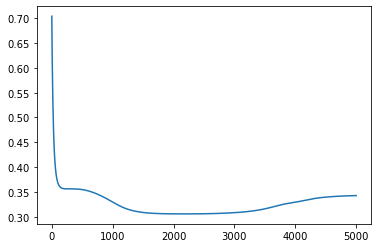

In [88]:
plt.plot(cost_)

# Convolutional Neural Network Base - Hand Coding - 1B

In [89]:
import cv2

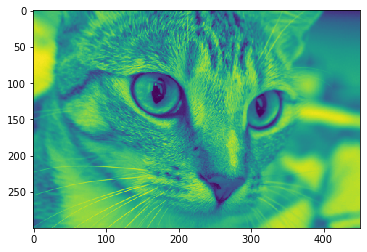

In [90]:
#reading the image
import skimage.data
img =skimage.data.chelsea()
#img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = skimage.color.rgb2gray(img)
plt.imshow(img)

In [91]:
l1_filter  = np.zeros((2,3,3)) # two filters of 3,3
l1_filter

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [92]:
l1_filter[0,:,:] = np.array([[[-1,0,1],
                             [-1,0,1],
                             [-1,0,1]
                             ]])
l1_filter[1,:,:] = np.array([[[1,1,1],
                             [0,0,0],
                             [-1,-1,-1]
                             ]])
#filters are ready now convolving is needed

In [100]:
#the actual Convolution function
def conv_(img,conv_filter):
    filter_size = conv_filter.shape[-1]
    result = numpy.zeros((img.shape))
    
    #looping through out the image for convolving
    
    for r in np.uint16(np.arange(filter_size/2.0,
                                      img.shape[0]-filter_size/2.0+1)):
        
        for c in np.uint16(np.arange(filter_size/2.0,
                                          img.shape[1]-filter_size/2.0+1)):
            '''
            Getting the region that is to be multiplied , getting the specific
            regions based on the filter 
            '''
            curr_region = img[r-np.uint16(np.floor(filter_size/2.0)):r+np.uint16(np.ceil(filter_size/2.0)),
                             c-np.uint16(np.floor(filter_size/2.0)):c+np.uint16(np.ceil(filter_size/2.0))]
            #multiplying (element wise) btw the current region and the filter
            curr_result = curr_region * conv_filter
            conv_sum = np.sum(curr_result) #summing the results
            result[r,c] = conv_sum #saving in the specific feature map 
            
    final_result = result[np.uint16(filter_size/2.0):result.shape[0]-np.uint16(filter_size/2.0),
                         np.uint16(filter_size/2.0):result.shape[1]-np.uint16(filter_size/2.0)]
    
    return final_result

In [94]:
def conv(img,conv_filter):
    if (len(img.shape)>2 or len(conv_filter.shape)>3):
        if img.shape[-1]!= conv_filter.shape[-1]:  #checking for channel matching
            print("Error Dimensions doesnt match, Convert the image to Grayscale /try")
            sys.exit()
    if conv_filter.shape[1]!= conv_filter.shape[2]: #checking filter dimensions
        print("Filter must be a Square , Incorrect shape for filter identified")
        sys.exit()
    if conv_filter.shape[1]%2==0:  #checking for odd filters only
        print("filter must be ODD sized")
        sys.exit()

        #feature map to hold/store the new convolved outputs 
    feature_maps = np.zeros((img.shape[0]-conv_filter.shape[1]+1,
                            img.shape[1]-conv_filter.shape[1]+1,
                            conv_filter.shape[0]))
    #convolution begins

    for filter_num in range(conv_filter.shape[0]):
        print("filter = ",filter_num+1)
        curr_filter = conv_filter[filter_num,:]  #getting thee current filter
        '''
        Checking for multiple channels , then convolving and results are summed

        '''
        if len(curr_filter.shape)>2:
            conv_map = conv_(img[:,:,0],curr_filter[:,:,0]) #array holding sum of all fMAPS
            for ch_num in range(1,curr_filter.shape[-1]): #convolving each channel with and summing
                conv_map = conv_map + conv_(img[:,:,ch_num],
                                           curr_filter[:,:,ch_num])
        else:
            conv_map = conv_(img,curr_filter)
        feature_maps[:,:,filter_num] = conv_map  #holding the feature map with current filter
            
    return feature_maps
                    

In [95]:
#conv(img , l1_filter)

In [96]:
#l1_filter.shape
#img.shape[0]-l1_filter.shape[1]+1,img.shape[1]-l1_filter.shape[1]+1,l1_filter.shape[0]

In [97]:
#RELU Layer
def relu(feature_map):
    relu_out = numpy.zeros(feature_map.shape)
    
    for map_num in range(feature_map.shape[-1]):
        for r in np.arange(0,feature_map.shape[0]):
            for c in np.arange(0,feature_map.shape[1]):
                relu_out[r,c,map_num] = np.max([feature_map[r,c,map_num],0])
    return relu_out

In [98]:
#Pooling Layer

def pooling(feature_map,size=2,stride=2):
    #output for poolinglayer
    pool_out = np.zeros((np.uint16((feature_map.shape[0]-size+1)/stride),
                                   np.uint16((feature_map.shape[1]-size+1)/stride),
                        feature_map.shape[-1]))
    for map_num in range(feature_map.shape[-1]):
        r2 = 0 
        for r in np.arange(0,feature_map.shape[0]-size-1,stride):
            c2 = 0 
            
            for c in np.arannge(0,feature_map.shape[1]-size-1,stride):
                pool_out[r2,c2,map_num] = np.max([feature_map[r:r+size,c:c+size,map_num]])
                c2+=1
            r2+=1
    return pool_out
    
    

In [102]:
fmap = conv(img,l1_filter)

filter =  1
filter =  2


In [108]:
fmap.shape

(298, 449, 2)

0
1


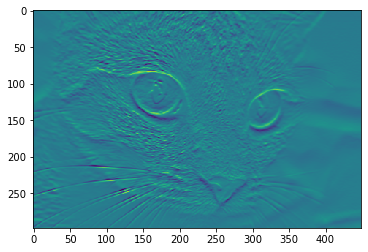

In [116]:
for x in range(len(fmap.shape)-1):
    
    plt.imshow(fmap[:,:,x])
    print(x)
    